<a href="https://colab.research.google.com/github/Th4l3s-pr0g/estudo-IA-CC/blob/main/ReconhecimentoImagem2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passo 1 - importar TensorFlow, que é uma biblioteca da Google que abrange diversas funcionalidades desenvolvidas para a aplicação de Inteligência Artificial.

In [34]:
import tensorflow as tf
print(tf.__version__)

2.15.0


Passo 2 - vamos carregar um banco de dado que contempla diversas imagens. O TensorFlow já disponibiliza bancos de imagens nativamente. No nosso caso, utilizaremos o fashion mnist.

In [35]:
mnist = tf.keras.datasets.fashion_mnist

Passo 3: vamos chamar a função "load_data()" do objeto mnist para carregar os dados de treinamento e teste. A função "load_data()" já separa os dados para cada categoria.

In [36]:
(training_images, training_labels), (test_images,test_labels) = mnist.load_data()

Passo 4: uma vez que as imagen foram carregadas, vamos verificar quantidade de imagens separadas para treinamento e quantidade separada para testes.

In [37]:
print("Quantidade de imagens aeparadas para treinamento:", len(training_images))
print("Quantidade de imagens aeparadas para teste:", len(test_images))

Quantidade de imagens aeparadas para treinamento: 60000
Quantidade de imagens aeparadas para teste: 10000


Passo 5: vamos analisar algumas imagens com os respectivos labels para entendermos melhor como a máquina deduz o tipo de imagem.

[[  0   0   0   0   0   0   0   0   0   0 118 204 181 175 213 199 168 197 111   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 173 225 185 179 225 158 142 227 173   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 170 229 226 226 233 151 167 234 158   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 194 222 212 226 222 240 218 230 163   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 198 222 210 207 211 207 208 231 147   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 188 220 209 210 211 215 208 230 144   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 214 220 212 220 213 239 158   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 217 216 215 219 216 238 160   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 185 231 218 221 215 218 214 238 170   

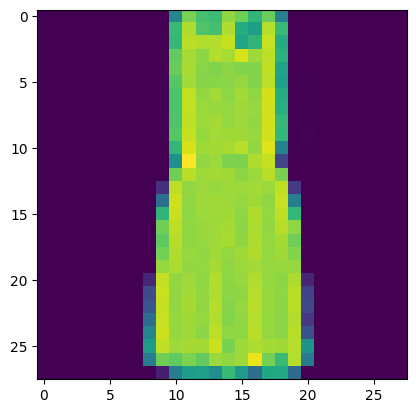

In [38]:
import numpy as np
np.set_printoptions(linewidth=200)
print(training_images[30000])

import matplotlib.pyplot as plt
plt.imshow(training_images[30000])

print("label correspondente:", training_labels[30000])

Passo 6: após analisar algumas imagens, vimos que o valor dos pixels variam de 0 a 255. No entanto, para treinar uma rede neural é conveniente que façamos a normalização dos valores de cada pixel, para ficarem entre 0 e 1.

In [39]:
training_images = training_images/255.0
test_images = test_images/255.0
#print(training_images[30000])

Passo 7:temos dois conjuntos de imagens: um que será utilizado para treinar o modelo e outro que será utilizado para testar o modelo treinado. Esta separação ocorre para evitarmos o overfitting. Dessa forma, vamos utilizar o conjunto de imagens que está na variável training_images para treinar a rede. Depois validaremos a acurácia da rede treinada utilizando o conjunto armazenado na variável test_images.

Vamos agora criar o modelo e depois exploraremos alguns conceitos.

In [40]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
                                    ]

)

Comentários relacionados ao modelo criado.

**1. Sequential:**  define uma sequência de camadas para a rede neural. É como se fosse criado um cerébro vazio que receberá várias camadas.

**2. Flatten:** lembre-se que as imagens do fashion mnist possuem resolução 28 x 28. O Flatten tranforma a matriz em um array unidimensional de 784 posições. O Flatten "achata" a matriz.

**3. Dense:** função utilizada para criar camadas com neurônios. Pode abranger diferentes funções matemáticas de ativação. **Relu:** se x>0, retorna 1, senão, retorna 0. **Softmax:** retorna a probabilidade, entre 0 e 1, do neurônio ser o resultado final. No nosso caso, temos 10 neurônios na última camada porque o dataset possui 10 tipos de roupas distintas.

Passo 8: agora que as imagens estão normalizadas e que a arquitetura da rede neural foi criada, é hora de partirmos para o treinamento. Iremos definir a quantidade de épocas na qual a rede será treinada. É importante observar que a cada época é possível medir a acurácia do modelo. A acurácia mede o volume de acerto da rede neural.

In [41]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5010 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3762 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3373 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3138 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2954 - accuracy: 0.8897
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2802 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2687 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2566 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2467 - accuracy: 0.9094
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.237

Passo 9: uma vez que a rede foi treinada, vamos verificar a sua acurácia ao tentar deduzir as roupas armazenadas para teste>

In [42]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3260 - accuracy: 0.8879


[0.3260115087032318, 0.8878999948501587]

Agora que o modelo foi treinado e vimos que teve uma boa performanca, vamos brincar um pouco com a rede neural. No primeiro teste avaliaremos a probabilidade de saída de cada neurônio.

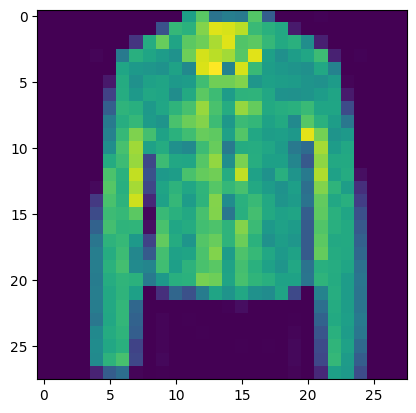

In [43]:
plt.imshow(test_images[10])

In [44]:
classificacao = model.predict(test_images)
for i in range(10):
  print("%.2f"%classificacao[10,i])

313/313 [==============================] - 1s 2ms/step
0.00
0.00
0.11
0.00
0.87
0.00
0.02
0.00
0.00
0.00


Para melhorar o entendimento, iremos aplicar o mesmo modelo, mas sem normalizar as imagens.

In [45]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


#training_images = training_images/255.0
#test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
                                    ]
)

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 3.1718 - accuracy: 0.6851
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6609 - accuracy: 0.7573
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6215 - accuracy: 0.7785
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5450 - accuracy: 0.8073
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5249 - accuracy: 0.8166
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5078 - accuracy: 0.8268
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4909 - accuracy: 0.8319
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4822 - accuracy: 0.8350
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4849 - accuracy: 0.8355
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.475

Agora, vamos fazer uma mesma rede, mas com um número maior de neurônios na camada oculta.

In [46]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images,test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
                                    ]
)

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4824 - accuracy: 0.8288
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3661 - accuracy: 0.8673
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3276 - accuracy: 0.8797
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3041 - accuracy: 0.8879
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2847 - accuracy: 0.8938
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2690 - accuracy: 0.8998
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2584 - accuracy: 0.9023
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2485 - accuracy: 0.9073
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2357 - accuracy: 0.9119
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.228

Agora vamos fazer uma rede contempla mais de uma camada oculta.

In [47]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images,test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
                                    ]
)

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4908 - accuracy: 0.8221
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3678 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3318 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3075 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2921 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2772 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2628 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2543 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2440 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.233

Vamos ver o que acontece se colocarmos apenas cinco neurônios na camada de saída.

In [48]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images,test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation = tf.nn.softmax)
                                    ]
)

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 250, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 748, in __init__

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-48-998f319543b4>", line 18, in <cell line: 18>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 5 0 2 3 1 6 0 7 9 1 2 7 3 5 9 7 2 7 9 1 3 2 7 9 0 6 5 8 5 1 9 0
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_941330]

Vamos treinar a rede com mais épocas.

In [49]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images,test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
                                    ]
)

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4957 - accuracy: 0.8253
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3738 - accuracy: 0.8653
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3329 - accuracy: 0.8780
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3096 - accuracy: 0.8865
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2927 - accuracy: 0.8935
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2773 - accuracy: 0.8963
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2662 - accuracy: 0.9010
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2566 - accuracy: 0.9042
Epoch 9/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2468 - accuracy: 0.9073
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.236

Para matar a parte de reconhecimento de imagem, vamos fazer um código digno de venda. Vamos utilizar o callback. O callback é utilizado para interromper o treinamento de uma rede quando determinado valor de acurácia é atingido.

In [50]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.92):
      print("\n Foi atingida a acurácia de 92%  então o treinamento será suspenso.")
      self.model.stop_training=True


mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images,test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
                                    ]
)

callbacks = myCallback()

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=30, callbacks=[callbacks])

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4948 - accuracy: 0.8266
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3748 - accuracy: 0.8650
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3358 - accuracy: 0.8770
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3121 - accuracy: 0.8857
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2927 - accuracy: 0.8922
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2783 - accuracy: 0.8968
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2660 - accuracy: 0.9018
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2555 - accuracy: 0.9048
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2446 - accuracy: 0.9086
Epoch 10/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.236